DBSCAN (Density-Based Spatial Clustering of Applications with Noise) 

Es un algoritmo de clustering no supervisado que agrupa puntos basándose en la densidad de datos. A diferencia de otros métodos como k-means, no necesita saber el número de clusters de antemano y puede detectar ruido (outliers).

IMPORACION DE LIBRERIAS NECESARIAS

In [4]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Carga y exploración inicial del dataset

# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv("MusicInfo.csv") 

# Inspeccionar la forma del DataFrame: número de filas y columnas
print("Dimensiones del dataset (filas, columnas):", df.shape)



Dimensiones del dataset (filas, columnas): (50683, 21)


In [6]:
# Listar los nombres de las columnas disponibles
print("Columnas del dataset:")
columns_df = pd.DataFrame(df.columns, columns=['Columnas del dataset'])
display(columns_df)

Columnas del dataset:


,Columnas del dataset
0,track_id
1,name
2,artist
3,spotify_preview_url
4,spotify_id
5,tags
6,genre
7,year
8,duration_ms
9,danceability


In [7]:
# Mostrar los primeros 5 registros del DataFrame
print("\nPrimeras 5 filas:")
display(df.head())


Primeras 5 filas:


,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


In [8]:
#Preprocesamiento de datos

#Seleccionar únicamente las columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("Variables numéricas detectadas:")
print(numeric_cols.tolist())

Variables numéricas detectadas:
['year', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


In [9]:
# Verificar si hay valores faltantes en esas columnas
print("\nCantidad de valores nulos por variable numérica:")
print(df[numeric_cols].isnull().sum())

# → Si hay pocos nulos, podemos eliminar filas; si son muchos, conviene imputar.



Cantidad de valores nulos por variable numérica:
year                0
duration_ms         0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64


In [10]:
# Calcular el porcentaje de filas con al menos un valor nulo en variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Filas que tienen al menos un NaN en cualquiera de las columnas numéricas
rows_with_null = df[numeric_cols].isnull().any(axis=1)
count_null_rows = rows_with_null.sum()
total_rows = len(df)
percent_null_rows = count_null_rows / total_rows * 100

print(f"Filas con al menos un valor nulo: {count_null_rows} de {total_rows} ({percent_null_rows:.2f}%)")

Filas con al menos un valor nulo: 0 de 50683 (0.00%)


In [44]:
# Opción A: Eliminar filas con nulos
#df_num = df[numeric_cols].dropna()
#print(f"Forma tras dropna(): {df_num.shape}")

# Opción B: Imputar nulos usando la media de cada columna
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy="mean")
# df_num = pd.DataFrame(
#     imputer.fit_transform(df[numeric_cols]),
#     columns=numeric_cols,
# )
# print(f"Forma tras imputación: {df_num.shape}")

#  Escalar las variables para que tengan media 0 y varianza 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_cols])

# Verificamos que el escalado funcionó: media ≈0, varianza ≈1
print("Media tras escalado (≈0):", X_scaled.mean(axis=0))
print("Varianza tras escalado (≈1):", X_scaled.var(axis=0))

Media tras escalado (≈0): [ 1.20757077e-14  2.80387008e-18  8.07514582e-17  2.15897996e-16
 -8.66395854e-17 -1.75522267e-16 -2.35525087e-17  4.48619212e-17
 -1.68232205e-17 -5.38343055e-17  6.47693988e-17 -4.82265653e-17
  1.70475301e-16  5.59652468e-16]
Varianza tras escalado (≈1): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


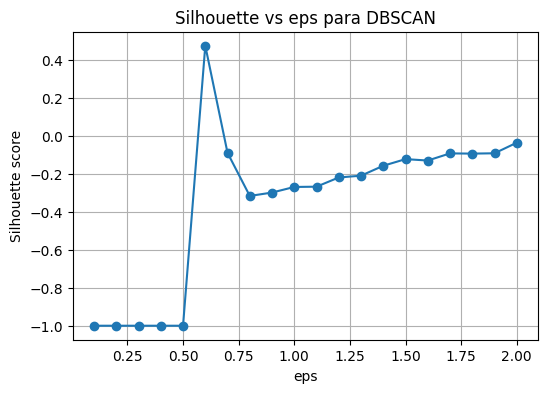

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_values = np.linspace(0.1, 2.0, 20)
sil_scores = []

best_score = -1
best_eps = None

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=5).fit(X_scaled)
    labels = db.labels_
    # Solo cálculo si hay al menos 2 clusters y hay puntos sin etiqueta -1
    mask = labels != -1
    if len(set(labels[mask])) > 1:
        sil = silhouette_score(X_scaled[mask], labels[mask])
    else:
        sil = -1
    sil_scores.append(sil)

plt.figure(figsize=(6,4))
plt.plot(eps_values, sil_scores, marker='o')
plt.xlabel("eps")
plt.ylabel("Silhouette score")
plt.title("Silhouette vs eps para DBSCAN")
plt.grid(True)
plt.show()


In [ ]:
# Visualización de los datos
scaler    = StandardScaler()
X_scaled  = scaler.fit_transform(df[numeric_cols])

In [65]:
# Configurar DBSCAN con eps bajo para clusters densos
dbscan_low = DBSCAN(eps=0.5844, min_samples=5)
dbscan_low.fit(X_scaled)

DBSCAN(eps=0.5844)

In [66]:
# Mostrar etiquetas únicas detectadas
labels_low = dbscan_low.labels_
print("Etiquetas únicas (eps=0.5, min_samples=5):", np.unique(labels_low))

Etiquetas únicas (eps=0.5, min_samples=5): [-1  0  1  2  3  4  5]


In [19]:
# Configurar DBSCAN con un eps mayor para intentar unir regiones dispersas
dbscan_high = DBSCAN(eps=3, min_samples=5)
dbscan_high.fit(X_scaled)

DBSCAN(eps=3)

In [20]:
labels_high = dbscan_high.labels_
print("Etiquetas únicas (eps=1.0, min_samples=5):", np.unique(labels_high))

Etiquetas únicas (eps=1.0, min_samples=5): [-1  0  1  2  3]


In [33]:
dbscan_tres = DBSCAN(eps=5, min_samples=5)
dbscan_tres.fit(X_scaled)

DBSCAN(eps=5)

In [32]:
labels_tres = dbscan_tres.labels_
print("Etiquetas únicas (eps=1.0, min_samples=5):", np.unique(labels_tres))

Etiquetas únicas (eps=1.0, min_samples=5): [-1  0]


In [22]:
def plot_dbscan(dbscan, X, size=100, show_xlabels=True, show_ylabels=True):
    core_mask      = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = (dbscan.labels_ == -1)
    non_core_mask  = ~(core_mask | anomalies_mask)

    cores     = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired",
                edgecolor='k', label="Núcleo")
    plt.scatter(cores[:, 0], cores[:, 1],
                marker='*', s=20, c=dbscan.labels_[core_mask],
                label="Centroide")
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=80, label="Ruido")
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".", label="Frontera")

    if show_xlabels:
        plt.xlabel("Componente 1 (escalada)")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("Componente 2 (escalada)")
    else:
        plt.tick_params(labelleft=False)

    # ← Estas líneas TAMBIÉN deben ir dentro de la función
    plt.title(f"DBSCAN eps={dbscan.eps}, min_samples={dbscan.min_samples}")
    plt.legend(loc="best")
    plt.tight_layout()


C:\Users\ASUS TUF GAMING A15\AppData\Local\Temp\ipykernel_21360\4063289869.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best")


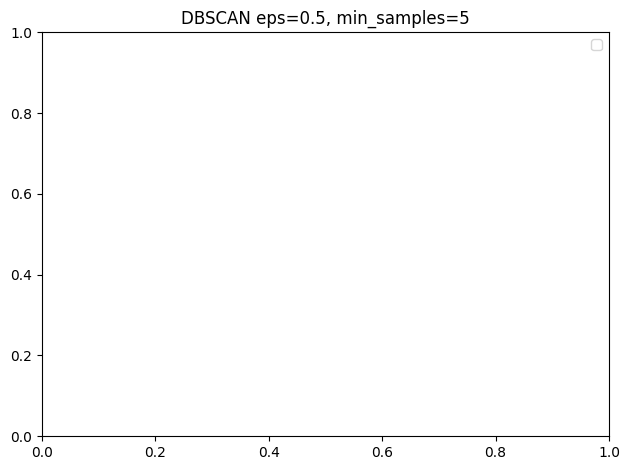

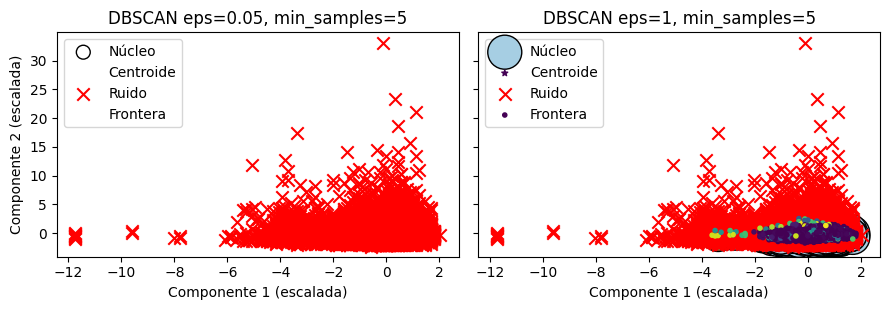

In [68]:
# Supongamos que X_scaled ya está calculado y tiene más de 2 columnas:
X2 = X_scaled[:, :2]  

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan_low, X2, size=100)

plt.subplot(122)
plot_dbscan(dbscan_high, X2, size=600, show_ylabels=False)

plt.show()
